In [1]:
import numpy as np
import pandas as pd
from time import time

In [2]:
train_set = pd.read_csv('.../MNIST/train.csv')
test_set = pd.read_csv('.../MNIST/test.csv')

In [3]:
train_set.shape

(42000, 785)

In [4]:
test_set.shape

(28000, 784)

In [5]:
trX = train_set.iloc[:, 1:]
trY = train_set.iloc[:, 0]

In [6]:
# convert from [0:255] => [0.0:1.0]
trX = np.multiply(trX, 1.0 / 255.0)

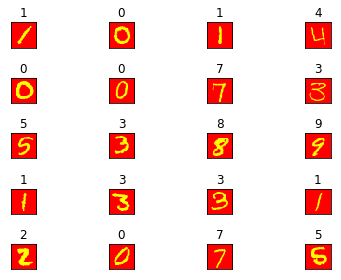

In [6]:
# STEP 1 - plot the data
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(0,20):
    plt.subplot(5, 4, i+1) #make a grid 5x4 and start to fill this grid from the position i+1, 
    # i starting value is 0 so 0+1=1
    label = trY.iloc[i] #used or the title of every image
    matrix_data = trX.iloc[i, :].as_matrix().reshape(28, 28)#recompose the images in oreder to be visualized
    plt.imshow(matrix_data, cmap='autumn')#visualization of the data
    plt.xticks([])#empty x axis
    plt.yticks([])#empty y axis
    plt.title(label)#put the title in every image
    
plt.tight_layout()#make the plot not overlapping

In [8]:
# STEP 2 - train a random forest classifier and time the whole operation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

n_estimator = np.array([1,5,10,50,100,200,500]) # make an array with a list of the number of 'tree' judges
score_array = [] #create a list that will have the score for every numer of estimators

t0 = time() #set the initial time
for i in n_estimator: #begin the for loop for every # of estimator
    clf = RandomForestClassifier(i) #initialize the random forest with the # of estimator
    trainX, testX, trainY, testY = train_test_split(trX, trY, train_size=0.8) #use the imported module to split the
    # dataset into training and testing set
    clf.fit(trainX, trainY) #train the classifier with the training dataset
    score_array.append(clf.score(testX, testY)) #store the score in the created list
    print('the score with %d' % i)
    print(clf.score(testX, testY))
    
print('time to elaborate:')
print(time() - t0) #print the time that it took to elaborate the for cycle

the score with 1
0.801666666667
the score with 5
0.902023809524
the score with 10
0.938333333333
the score with 50
0.956428571429
the score with 100
0.967738095238
the score with 200
0.966428571429
the score with 500
0.967619047619
time to elaborate:
217.80487275123596


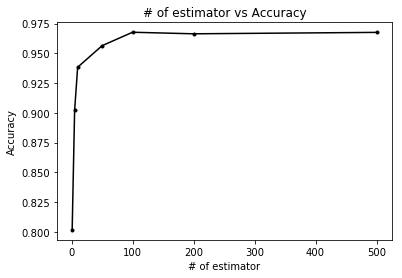

In [9]:
plt.errorbar(n_estimator, score_array, fmt='k.-')
plt.xlabel('# of estimator')
plt.ylabel('Accuracy')
plt.title('# of estimator vs Accuracy')

As you can see once the score of 0.96 is reached any increase in the number of the estimator does not increase the score. I can say that 100 estimators is the right choice

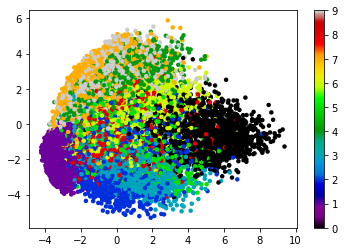

In [10]:
# STEP 3 - use the PCA to reduce the dimension of the dataset in order to visualize it and reduce the elaboration time

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(trainX)
transform = pca.transform(trainX)
plt.scatter(transform[:, 0], transform[:, 1],s=20, c = trainY, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
plt.clim(0,9)

With PCA I can visualize the dataset, the problem now is that I want to know how much variace is captured by this model with 2 components. I will try a for loop in order to see which number of components best capture the variace in the dataset

In [11]:
n_components_array = ([1,2,3,4,5,10,20,50,100,200,500]) # number of components to try with
captured_variance = [] # list that will contain the variance

t0 = time() # initialize the timer
for i in n_components_array: # start the for loop
    pca = PCA(n_components=i) # initialize PCA with the number of selected components
    pca.fit(trainX) # fit the model on the training dataset
    transform = pca.transform(trainX) # transform the dataset
    captured_variance.append(sum(pca.explained_variance_ratio_)) # calcolate the captured variance
    variance = sum(pca.explained_variance_ratio_) # store the captured variance
    print('The explained variance with %d components is equal to %f' %(i, variance)) # print the result
    
    
print('time to elaborate:')
print(time() - t0)


The explained variance with 1 components is equal to 0.097732
The explained variance with 2 components is equal to 0.169281
The explained variance with 3 components is equal to 0.231015
The explained variance with 4 components is equal to 0.284760
The explained variance with 5 components is equal to 0.333913
The explained variance with 10 components is equal to 0.489971
The explained variance with 20 components is equal to 0.645456
The explained variance with 50 components is equal to 0.825908
The explained variance with 100 components is equal to 0.914786
The explained variance with 200 components is equal to 0.966287
The explained variance with 500 components is equal to 0.999252
time to elaborate:
34.420491456985474


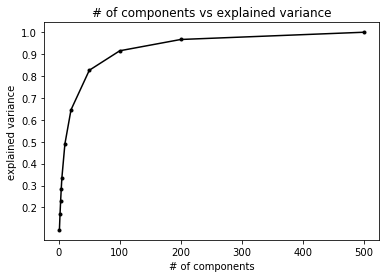

In [12]:
plt.plot(n_components_array, captured_variance, 'k.-')
plt.yticks(np.linspace(0.2,1.0,9))
plt.xlabel('# of components')
plt.ylabel('explained variance')
plt.title('# of components vs explained variance')

Once I reach 100 components I have already explained 90% of the original variance. Last thing I want to see is how much accuracy I get in function of the number of components.

In [9]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
# STEP 4 - Accuracy as a function of the number of components of PCA
# I will do the prediction with KNN because it seems that random forest does worse when PCA is in action

components_pca = ([1,2,3,4,5,10,20,50,100,200,500])
clf = KNeighborsClassifier() # Create the classifier
score_diff_comp = []

t0 = time()
for i in components_pca:
    pca = PCA(n_components=i)
    pca.fit(trX)
    transform = pca.transform(trX)
    trainX, testX, trainY, testY = train_test_split(transform, trY, train_size=0.8)
    
    clf.fit(trainX, trainY)
    acc = clf.score(testX, testY)
    score_diff_comp.append(acc) #store the score in the created list
    
    print('With %d components PCA the accuracy is %f' %(i, acc))

    
print('time to elaborate:')
print(time() - t0)

With 1 components PCA the accuracy is 0.273810
With 2 components PCA the accuracy is 0.428690
With 3 components PCA the accuracy is 0.480714
With 4 components PCA the accuracy is 0.630000
With 5 components PCA the accuracy is 0.737500
With 10 components PCA the accuracy is 0.922857
With 20 components PCA the accuracy is 0.962500
With 50 components PCA the accuracy is 0.973810
With 100 components PCA the accuracy is 0.970238
With 200 components PCA the accuracy is 0.968810
With 500 components PCA the accuracy is 0.969167
time to elaborate:
533.4608826637268


It seems that I gain the best accuracy with PCA with 50 components, I now have all the elements for the submission

In [13]:
pca = PCA(n_components=50)# 50 components PCA
pca.fit(trX)
transform = pca.transform(trX)

clf = KNeighborsClassifier()
clf.fit(transform, trY)# train the classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
pred = clf.predict(pca.transform(test_set)) # predict on the test dataset

In [28]:
submission = pd.DataFrame() # create a new dataframe
submission['ImageID'] = test_set.index + 1 # insert imageID in the dataframe
submission['Label'] = pd.Series(pred) # insert the predicted label in the dataframe

submission.to_csv('submissionKNN.csv', index=False) # create the csv file for the submission

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(50)
trainX, testX, trainY, testY = train_test_split(trX, trY, train_size=0.8)
clf.fit(trainX, trainY)
clf.score(testX, testY)

0.95750000000000002